#Tarea 2
#Ricardo Zamora Mennigke
#Métodos Calibración de Modelos

Pregunta 1: [25 puntos] En este ejercicio usaremos los datos (voces.csv). Se trata de un problema de reconocimiento de g´enero mediante el an´alisis de la voz y el habla. Esta base de datos fue creada para identificar una voz como masculina o femenina, bas´andose en las propiedades ac´usticas de la voz y el habla. El conjunto de datos consta de 3.168 muestras de voz grabadas, recogidas de hablantes masculinos y femeninos. El conjunto de datos tiene las siguientes propiedades ac´usticas (variables) de cada voz. Realice lo siguiente:

1. Cargue la tabla de datos voces.csv en Python.

In [1]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
from matplotlib import colors as mcolors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns

C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('voces.csv',delimiter=',',decimal=".")
print(datos.shape)
print(datos.head())
print(datos.info())

C:\Users\rzamoram\OneDrive - Intel Corporation\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0

In [3]:
datos.describe(include = np.number)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [4]:
def distribucion_variable_predecir(data:DataFrame,variable_predict:str):
    colors = list(dict(**mcolors.CSS4_COLORS))
    df = pd.crosstab(index=data[variable_predict],columns="valor") / data[variable_predict].count()
    fig = plt.figure(figsize=(10,9))
    g = fig.add_subplot(111)
    countv = 0
    titulo = "Distribución de la variable %s" % variable_predict
    for i in range(df.shape[0]):
        g.barh(1,df.iloc[i],left = countv, align='center',color=colors[11+i],label= df.iloc[i].name)
        countv = countv + df.iloc[i]
    vals = g.get_xticks()
    g.set_xlim(0,1)
    g.set_yticklabels("")
    g.set_title(titulo)
    g.set_ylabel(variable_predict)
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    countv = 0 
    for v in df.iloc[:,0]:
        g.text(np.mean([countv,countv+v]) - 0.03, 1 , '{:.1%}'.format(v), color='black', fontweight='bold')
        countv = countv + v
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)

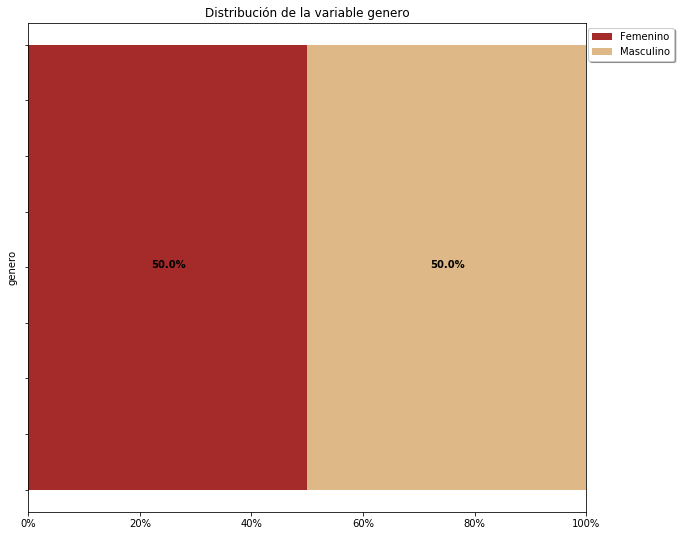

In [5]:
distribucion_variable_predecir(datos,"genero")


Problema equilibrado

In [6]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    precision_positiva = MC[1][1]/(MC[1][1] + MC[1][0])
    precision_negativa = MC[0][0]/(MC[0][0] + MC[0][1])
    falsos_positivos = 1 - precision_negativa
    falsos_negativos = 1 - precision_positiva
    asertividad_positiva = MC[1][1]/(MC[0][1] + MC[1][1])
    asertividad_negativa = MC[0][0]/(MC[0][0] + MC[1][0])
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria,
            "Precision Positiva (PP)": precision_positiva, 
            "Precision Negativa (PN)":precision_negativa, 
            "Falsos Positivos(FP)": falsos_positivos,
            "Falsos Negativos (FN)": falsos_negativos,
            "Asertividad Positiva (AP)": asertividad_positiva,
            "Asertividad Negativa (NP)": asertividad_negativa}

In [7]:
def poder_predictivo_categorica(data:DataFrame, var:str, variable_predict:str):
    df = pd.crosstab(index= data[var],columns=data[variable_predict])
    df = df.div(df.sum(axis=1),axis=0)
    titulo = "Distribución de la variable %s según la variable %s" % (var,variable_predict)
    g = df.plot(kind='barh',stacked=True,legend = True, figsize = (10,9), \
                xlim = (0,1),title = titulo, width = 0.8)
    vals = g.get_xticks()
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)
    for bars in g.containers:
        plt.setp(bars, width=.9)
    for i in range(df.shape[0]):
        countv = 0 
        for v in df.iloc[i]:
            g.text(np.mean([countv,countv+v]) - 0.03, i , '{:.1%}'.format(v), color='black', fontweight='bold')
            countv = countv + v
            
def poder_predictivo_numerica(data:DataFrame, var:str, variable_predict:str):
    sns.FacetGrid(data, hue=variable_predict, height=6).map(sns.kdeplot, var, shade=True).add_legend()

2. Genere al azar una tabla de testing con una 20 % de los datos y con el resto de los datos genere una tabla de aprendizaje.

In [8]:
X = datos.iloc[:,:20] 
print(X.head())
y = datos.iloc[:,20:21] 
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.27586

3. Usando los m´etodos de Bayes, Discriminante Lineal y Discriminante Cuadr´atico genere modelos predictivos para la tabla de aprendizaje.

In [9]:
##Bayes
bayes = GaussianNB()
print(bayes)
bayes.fit(X_train, y_train.iloc[:,0].values)

GaussianNB(priors=None, var_smoothing=1e-09)


GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
##Discriminante lineal
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')
print(lda)
lda.fit(X_train, y_train.iloc[:,0].values)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [11]:
##Discriminante cuadratico
qda = QuadraticDiscriminantAnalysis()
print(qda)
qda.fit(X_train, y_train.iloc[:,0].values)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

4. Con la tabla de testing calcule la matriz de confusi´on, la precisi´on, la precisi´on positiva, la precisi´on negativa, los falsos positivos, los falsos negativos, la acertividad positiva y la acertividad negativa. Luego construya un cuadro comparativo.

In [13]:
##Bayes
print("Las predicciones en Testing son: {}".format(bayes.predict(X_test)))

Las predicciones en Testing son: ['Femenino' 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino'
 'Femenino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Masculino' 'Masculino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Masculino' 'Femenino'
 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino' 'Femenino'
 'Femenino' 'Masculino' 'Femenino' 'Femenino' 'Femenino' 'Masculino'
 'Masculino' 'Femenino' 'Masculino' 'Femenino' 'Masculino' 'Masculino'
 'Masculino' 'Femenino' 'Femenino' 'Masculino' 'Femenin

In [14]:
prediccion = bayes.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[261  40]
 [ 38 295]]

Precisión Global:
0.8769716088328076

Error Global:
0.12302839116719244

Precisión por categoría:
   Femenino  Masculino
0   0.86711   0.885886

Precision Positiva (PP):
0.8858858858858859

Precision Negativa (PN):
0.867109634551495

Falsos Positivos(FP):
0.13289036544850497

Falsos Negativos (FN):
0.1141141141141141

Asertividad Positiva (AP):
0.8805970149253731

Asertividad Negativa (NP):
0.8729096989966555


In [15]:
##Discriminante lineal
#print("Las predicciones en Testing son: {}".format(lda.predict(X_test)))
prediccion = lda.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[286  15]
 [  8 325]]

Precisión Global:
0.9637223974763407

Error Global:
0.0362776025236593

Precisión por categoría:
   Femenino  Masculino
0  0.950166   0.975976

Precision Positiva (PP):
0.975975975975976

Precision Negativa (PN):
0.9501661129568106

Falsos Positivos(FP):
0.04983388704318936

Falsos Negativos (FN):
0.024024024024024038

Asertividad Positiva (AP):
0.9558823529411765

Asertividad Negativa (NP):
0.9727891156462585


In [16]:
##Discriminante cuadratico
#print("Las predicciones en Testing son: {}".format(qda.predict(X_test)))
prediccion = qda.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[282  19]
 [192 141]]

Precisión Global:
0.667192429022082

Error Global:
0.332807570977918

Precisión por categoría:
   Femenino  Masculino
0  0.936877   0.423423

Precision Positiva (PP):
0.42342342342342343

Precision Negativa (PN):
0.9368770764119602

Falsos Positivos(FP):
0.06312292358803984

Falsos Negativos (FN):
0.5765765765765766

Asertividad Positiva (AP):
0.88125

Asertividad Negativa (NP):
0.5949367088607594


In [17]:
A = np.matrix([[0.8769716088328076, 0.12302839116719244, 0.8858858858858859, 0.867109634551495, 0.13289036544850497, 0.1141141141141141, 0.8805970149253731, 0.8729096989966555],
               [0.9637223974763407, 0.0362776025236593, 0.975975975975976, 0.9501661129568106, 0.04983388704318936, 0.024024024024024038, 0.9558823529411765, 0.9727891156462585],
              [0.667192429022082, 0.332807570977918, 0.42342342342342343, 0.9368770764119602, 0.06312292358803984, 0.5765765765765766, 0.88125, 0.5949367088607594]])
mi_df = pd.DataFrame(A)
nombres_filas = ["Naive Bayes","Discriminante Lineal","Discriminante Cuadratico"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
Naive Bayes,0.876972,0.123028,0.885886,0.867110,0.132890,0.114114,0.880597,0.872910
Discriminante Lineal,0.963722,0.036278,0.975976,0.950166,0.049834,0.024024,0.955882,0.972789
Discriminante Cuadratico,0.667192,0.332808,0.423423,0.936877,0.063123,0.576577,0.881250,0.594937


El discriminante lineal resulta mejor tiene mayor precision global y menos datos confundidos en general

5. Construya un cuadro comparativo con respecto a la tarea anterior y las tareas del curso anterior. ¿Cu´al m´etodo es mejor?

In [18]:
A = np.matrix([[0.7413249211356467, 0.25867507886435326, 0.7717717717717718, 0.707641196013289, 0.292358803986711, 0.2282282282282282, 0.744927536231884, 0.7370242214532872],
               [0.9794952681388013, 0.02050473186119872, 0.975975975975976, 0.9833887043189369, 0.01661129568106312, 0.024024024024024038, 0.9848484848484849, 0.9736842105263158],
              [0.9605678233438486, 0.039432176656151396, 0.963963963963964, 0.9568106312292359, 0.04318936877076407, 0.036036036036036, 0.9610778443113772, 0.96],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.9006309148264984, 0.09936908517350163, 0.9519519519519519, 0.8438538205980066, 0.15614617940199338, 0.048048048048048075, 0.8708791208791209, 0.9407407407407408],
              [0.9668769716088328, 0.03312302839116721, 0.960960960960961, 0.973421926910299, 0.02657807308970095, 0.03903903903903905, 0.975609756097561, 0.9575163398692811],
              [0.944794952681388, 0.05520504731861198, 0.948948948948949, 0.9401993355481728, 0.05980066445182719, 0.05105105105105101, 0.9461077844311377, 0.9433333333333334],
              [0.916403785488959, 0.08359621451104104, 0.987987987987988, 0.8372093023255814, 0.16279069767441856, 0.012012012012011963, 0.8703703703703703, 0.984375],
              [0.9810725552050473, 0.018927444794952675, 0.975975975975976, 0.9867109634551495, 0.013289036544850474, 0.024024024024024038, 0.9878419452887538, 0.9737704918032787],
              [0.9779179810725552, 0.02208201892744477, 0.9819819819819819, 0.973421926910299, 0.02657807308970095, 0.018018018018018056, 0.9761194029850746, 0.979933110367893],
              [0.9652996845425867, 0.034700315457413256, 0.987987987987988, 0.9401993355481728, 0.05980066445182719, 0.012012012012011963, 0.9481268011527377, 0.9860627177700348],
              [0.9542586750788643, 0.045741324921135695, 0.975975975975976, 0.9302325581395349, 0.06976744186046513, 0.024024024024024038, 0.9393063583815029, 0.9722222222222222],
              [0.9621451104100947, 0.03785488958990535, 0.9429429429429429, 0.9833887043189369, 0.01661129568106312, 0.0570570570570571, 0.9843260188087775, 0.9396825396825397],
              [0.9589905362776026, 0.04100946372239744, 0.987987987987988, 0.9269102990033222, 0.07308970099667778, 0.012012012012011963, 0.9373219373219374, 0.9858657243816255],
              [0.9810725552050473, 0.018927444794952675, 0.975975975975976, 0.9867109634551495, 0.013289036544850474, 0.024024024024024038, 0.9878419452887538, 0.9737704918032787],
              [0.9684542586750788, 0.03154574132492116, 0.975975975975976, 0.9601328903654485, 0.039867109634551534, 0.024024024024024038, 0.9643916913946587, 0.9730639730639731],
              [0.9574132492113565, 0.04258675078864349, 0.9669669669669669, 0.946843853820598, 0.05315614617940201, 0.033033033033033066, 0.9526627218934911, 0.9628378378378378],
              [0.9826498422712934, 0.017350157728706628, 0.9819819819819819, 0.9833887043189369, 0.01661129568106312, 0.018018018018018056, 0.9849397590361446, 0.9801324503311258],
              [0.9652996845425867, 0.034700315457413256, 0.96996996996997, 0.9601328903654485, 0.039867109634551534, 0.03003003003003002, 0.9641791044776119, 0.9665551839464883],
              [0.9637223974763407, 0.0362776025236593, 0.9819819819819819, 0.9435215946843853, 0.056478405315614655, 0.018018018018018056, 0.9505813953488372, 0.9793103448275862],
              [0.9779179810725552, 0.02208201892744477, 0.978978978978979, 0.9767441860465116, 0.023255813953488413, 0.02102102102102099, 0.978978978978979, 0.9767441860465116],
              [0.973186119873817, 0.02681388012618302, 0.972972972972973, 0.973421926910299, 0.02657807308970095, 0.027027027027026973, 0.9759036144578314, 0.9701986754966887],
              [0.9652996845425867, 0.034700315457413256, 0.987987987987988, 0.9401993355481728, 0.05980066445182719, 0.012012012012011963, 0.9481268011527377, 0.9860627177700348],
              [0.9779179810725552, 0.02208201892744477, 0.975975975975976, 0.9800664451827242, 0.019933554817275767, 0.024024024024024038, 0.9818731117824774, 0.9735973597359736],
              [0.9652996845425867, 0.034700315457413256, 0.963963963963964, 0.9667774086378738, 0.03322259136212624, 0.036036036036036, 0.9697885196374623, 0.9603960396039604],
              [0.9716088328075709, 0.028391167192429068, 0.975975975975976, 0.9667774086378738, 0.03322259136212624, 0.024024024024024038, 0.9701492537313433, 0.9732441471571907],
              [0.6798107255520505, 0.32018927444794953, 0.7807807807807807, 0.5681063122923588, 0.43189368770764125, 0.21921921921921927, 0.6666666666666666, 0.7008196721311475],
              [0.9242902208201893, 0.0757097791798107, 0.984984984984985, 0.8571428571428571, 0.1428571428571429, 0.01501501501501501, 0.8840970350404312, 0.9809885931558935],
              [0.9589905362776026, 0.04100946372239744, 0.9819819819819819, 0.9335548172757475, 0.06644518272425248, 0.018018018018018056, 0.9423631123919308, 0.9790940766550522],
              [0.9621451104100947, 0.03785488958990535, 0.9819819819819819, 0.9401993355481728, 0.05980066445182719, 0.018018018018018056, 0.9478260869565217, 0.9792387543252595],
              [0.6892744479495269, 0.31072555205047314, 0.8108108108108109, 0.5548172757475083, 0.4451827242524917, 0.18918918918918914, 0.6683168316831684, 0.7260869565217392],
              [0.9842271293375394, 0.01577287066246058, 0.987987987987988, 0.9800664451827242, 0.019933554817275767, 0.012012012012011963, 0.982089552238806, 0.9866220735785953],
              [0.8769716088328076, 0.12302839116719244, 0.8858858858858859, 0.867109634551495, 0.13289036544850497, 0.1141141141141141, 0.8805970149253731, 0.8729096989966555],
              [0.9637223974763407, 0.0362776025236593, 0.975975975975976, 0.9501661129568106, 0.04983388704318936, 0.024024024024024038, 0.9558823529411765, 0.9727891156462585],
              [0.667192429022082, 0.332807570977918, 0.42342342342342343, 0.9368770764119602, 0.06312292358803984, 0.5765765765765766, 0.88125, 0.5949367088607594]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos todas variables","K-vecinos 6 variables","Arbol de Decision (default)","Arbol de Decision (criterion='entropy',max_depth=2)","Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",
                 "Arbol de Decision 6 predictoras (default)","Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)","Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)", 
                 "Bosques", "XGBoosting", "ADA Boosting", "Bosques (n_estimators=7, max_depth=2, random_state=0) ", "XGBoosting(n_estimators=7, max_depth=2, random_state=0)", "ADA Boosting (n_estimators=7, random_state=0)",
                 "Bosques 6 predictoras (opcion 1)", "XGBoosting 6 predictoras (opcion 1)", "ADA Boosting 6 predictoras(opcion 1)",
                 "Bosques 6 predictoras (opcion 1)(n_estimators=700, max_depth=200, random_state=0)", "XGBoosting 6 predictoras (opcion 1)(n_estimators=700, max_depth=200, random_state=0)", "ADA Boosting 6 predictoras(opcion 1)(n_estimators=700, random_state=0)",
                 "Bosques 6 predictoras (opcion 2)", "XGBoosting 6 predictoras (opcion 2)", "ADA Boosting 6 predictoras(opcion 2)",
                 "Bosques 6 predictoras (opcion 2)(n_estimators=700, max_depth=200, random_state=0)", "XGBoosting 6 predictoras (opcion 2)(n_estimators=700, max_depth=200, random_state=0)", "ADA Boosting 6 predictoras(opcion 2)(n_estimators=700, random_state=0)", 
                 "SVM", "SVM linear", "SVM 6 predictoras (Opcion 1)", "SVM (Opcion 2)", "Redes Neuronales - MLPClassifier",
                 "Redes Neuronales con Tensor Flow y Keras", "Naive Bayes","Discriminante Lineal","Discriminante Cuadratico"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df


,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos todas variables,0.741325,0.258675,0.771772,0.707641,0.292359,0.228228,0.744928,0.737024
K-vecinos 6 variables,0.979495,0.020505,0.975976,0.983389,0.016611,0.024024,0.984848,0.973684
Arbol de Decision (default),0.960568,0.039432,0.963964,0.956811,0.043189,0.036036,0.961078,0.960000
"Arbol de Decision (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision (criterion='gini', splitter='random', max_depth=3)",0.900631,0.099369,0.951952,0.843854,0.156146,0.048048,0.870879,0.940741
Arbol de Decision 6 predictoras (default),0.966877,0.033123,0.960961,0.973422,0.026578,0.039039,0.975610,0.957516
"Arbol de Decision 6 predictoras (criterion='entropy',max_depth=2)",0.944795,0.055205,0.948949,0.940199,0.059801,0.051051,0.946108,0.943333
"Arbol de Decision 6 predictoras (criterion='gini', splitter='random', max_depth=3)",0.916404,0.083596,0.987988,0.837209,0.162791,0.012012,0.870370,0.984375
Bosques,0.981073,0.018927,0.975976,0.986711,0.013289,0.024024,0.987842,0.973770
XGBoosting,0.977918,0.022082,0.981982,0.973422,0.026578,0.018018,0.976119,0.979933


De los tres metodos en estudio el mejor metodo es el discriminante lineal. Pero a nivel general comparando todas las tecnicas, las Redes Neuronales con Tensor Flow y Keras proporcionan el modelo con la mayor precision global de hecho tiene muy pocos datos confundidos, lo que lo convierte en el mejor modelo hasta el momento.

Ejercicio 2: [25 puntos] Esta pregunta utiliza los datos (tumores.csv). Se trata de un conjunto de datos de caracter´ısticas del tumor cerebral que incluye cinco variables de primer orden y ocho de textura y cuatro par´ametros de evaluaci´on de la calidad con el nivel objetivo. La variables son: Media, Varianza, Desviaci´on est´andar, Asimetr´ıa, Kurtosis, Contraste, Energ´ıa, ASM (segundo momento angular), Entrop´ıa, Homogeneidad, Disimilitud, Correlaci´on, Grosor, PSNR (Pico de la relaci´on se˜nal-ruido), SSIM (´Indice de Similitud Estructurada), MSE (Mean Square Error), DC (Coeficiente de Dados) y la variable a predecir tipo (1 = Tumor, 0 = No-Tumor).

1. Usando Bayes, Discriminante Lineal y Discriminante Cuadr´atico genere modelos predictivos para la tabla tumores.csv usando 70 % de los datos para tabla aprendizaje y un 30 % para la tabla testing.

In [19]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Métodos Supervisados con Python/Clase 01")
print(os.getcwd())
datos = pd.read_csv('tumores.csv',delimiter=',',decimal=".")
datos['imagen'] = datos['imagen'].astype('category')
print(datos.shape)
print(datos.head())
print(datos.info())

C:\Users\rzamoram\OneDrive - Intel Corporation\Documents\Machine Learning\Métodos Supervisados con Python\Clase 01
(1275, 18)
   imagen      media     varianza  desviacion.estandar  entropia  asimetria  \
0  Image1  23.448517  2538.985627            50.388348  0.651174   1.984202   
1  Image2   4.398331   834.853030            28.893823  0.953532   6.495203   
2  Image3   3.244263   642.059166            25.338886  0.966065   7.772860   
3  Image4   8.511353  1126.214187            33.559115  0.868765   3.763142   
4  Image5  21.000793  2235.316978            47.279139  0.684724   1.936029   

    kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
0   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
1  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
2  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
3  15.107579  362.291213  0.921786  0.849690      0.949295     2.765725   
4   4.722343  312.439226

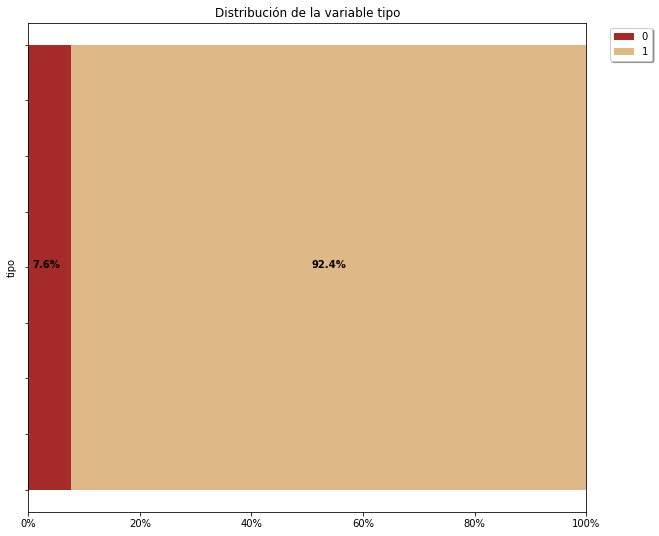

In [20]:
distribucion_variable_predecir(datos,"tipo")

Problema desbalanceado

In [22]:
X = datos.iloc[:,1:17] 
print(X.head())
y = datos.iloc[:,17:18] 
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

       media     varianza  desviacion.estandar  entropia  asimetria  \
0  23.448517  2538.985627            50.388348  0.651174   1.984202   
1   4.398331   834.853030            28.893823  0.953532   6.495203   
2   3.244263   642.059166            25.338886  0.966065   7.772860   
3   8.511353  1126.214187            33.559115  0.868765   3.763142   
4  21.000793  2235.316978            47.279139  0.684724   1.936029   

    kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
0   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
1  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
2  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
3  15.107579  362.291213  0.921786  0.849690      0.949295     2.765725   
4   4.722343  312.439226  0.804184  0.646711      0.880301     3.006660   

   correlacion        psnr      ssim       mse        dc  
0     0.968576   97.974630  0.777011  0.171163  0.303989  
1   

In [23]:
##Bayes
bayes = GaussianNB()
print(bayes)
bayes.fit(X_train, y_train.iloc[:,0].values)

GaussianNB(priors=None, var_smoothing=1e-09)


GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
##Discriminante lineal
lda = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto')
print(lda)
lda.fit(X_train, y_train.iloc[:,0].values)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [25]:
##Discriminante cuadratico
qda = QuadraticDiscriminantAnalysis()
print(qda)
qda.fit(X_train, y_train.iloc[:,0].values)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

2. Calcule para los datos de testing la precisi´on global y la matriz de confusi´on. Interprete la calidad de los resultados. Adem´as compare respecto a los resultados obtenidos en la tarea anterior y los resultados del curso anterior.

In [26]:
##Bayes
print("Las predicciones en Testing son: {}".format(bayes.predict(X_test)))

Las predicciones en Testing son: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
prediccion = bayes.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 10  23]
 [ 39 311]]

Precisión Global:
0.8381201044386423

Error Global:
0.16187989556135773

Precisión por categoría:
         0         1
0  0.30303  0.888571

Precision Positiva (PP):
0.8885714285714286

Precision Negativa (PN):
0.30303030303030304

Falsos Positivos(FP):
0.696969696969697

Falsos Negativos (FN):
0.11142857142857143

Asertividad Positiva (AP):
0.9311377245508982

Asertividad Negativa (NP):
0.20408163265306123


In [28]:
##Discriminante lineal
#print("Las predicciones en Testing son: {}".format(lda.predict(X_test)))
prediccion = lda.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 28   5]
 [ 10 340]]

Precisión Global:
0.9608355091383812

Error Global:
0.03916449086161877

Precisión por categoría:
          0         1
0  0.848485  0.971429

Precision Positiva (PP):
0.9714285714285714

Precision Negativa (PN):
0.8484848484848485

Falsos Positivos(FP):
0.1515151515151515

Falsos Negativos (FN):
0.02857142857142858

Asertividad Positiva (AP):
0.9855072463768116

Asertividad Negativa (NP):
0.7368421052631579


In [29]:
##Discriminante cuadratico
#print("Las predicciones en Testing son: {}".format(qda.predict(X_test)))
prediccion = qda.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


Matriz de Confusión:
[[ 33   0]
 [350   0]]

Precisión Global:
0.08616187989556136

Error Global:
0.9138381201044387

Precisión por categoría:
     0    1
0  1.0  0.0

Precision Positiva (PP):
0.0

Precision Negativa (PN):
1.0

Falsos Positivos(FP):
0.0

Falsos Negativos (FN):
1.0

Asertividad Positiva (AP):
nan

Asertividad Negativa (NP):
0.08616187989556136


C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\rzamoram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


Se denota que especialmente el modelo discriminante cuadratico, no logra correctamente determinar los datos al ajustar el modelo por lo que no resulta ideal para estos datos, al denotarse que solo ajusta no tumores, probablemente estos tengan un ajuste mas cuadratico que los si tumores. Por el modelo naive bayes funciona un poco mejor pero denota que tambien tiene problemas para identificar si tumores ya que tiene bastantes datos confundidos como no tumores que en realidad son. El analisis discriminante lineal resulta nuevamente el de mejor ajuste para estos datos dentro de los tres metodos probabilisticos.

In [30]:
A = np.matrix([[0.8981723237597912, 0.10182767624020883, 0.9742857142857143, 0.09090909090909091, 0.9090909090909091, 0.02571428571428569, 0.9191374663072777, 0.25],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091],
               [0.9817232375979112, 0.018276762402088753, 0.9885714285714285, 0.9090909090909091, 0.09090909090909094, 0.011428571428571455, 0.9914040114613181, 0.8823529411764706],
               [0.9765013054830287, 0.023498694516971286, 0.9942857142857143, 0.7878787878787878, 0.21212121212121215, 0.005714285714285672, 0.9802816901408451, 0.9285714285714286],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091],
               [0.9921671018276762, 0.007832898172323799, 0.9914285714285714, 1.0, 0.0, 0.008571428571428563, 1.0, 0.9166666666666666],
               [0.9843342036553525, 0.015665796344647487, 0.9914285714285714, 0.9090909090909091, 0.09090909090909094, 0.008571428571428563, 0.9914285714285714, 0.9090909090909091],
               [0.9869451697127938, 0.01305483028720622, 0.9914285714285714, 0.9393939393939394, 0.06060606060606055, 0.008571428571428563, 0.994269340974212, 0.9117647058823529],
               [0.9138381201044387, 0.08616187989556134, 1.0, 0.0, 1.0, 0.0, 0.9138381201044387, 0],
               [0.9347258485639687, 0.06527415143603132, 0.98, 0.45454545454545453, 0.5454545454545454, 0.020000000000000018, 0.9501385041551247, 0.6818181818181818],
               [0.9033942558746736, 0.09660574412532641, 0.9885714285714285, 0.0, 1.0, 0.011428571428571455, 0.9129287598944591, 0.0],
               [0.9138381201044387, 0.08616187989556134, 1.0, 0.0, 1.0, 0.0, 0.9138381201044387, 0.0],
               [0.8381201044386423, 0.16187989556135773, 0.8885714285714286, 0.30303030303030304, 0.696969696969697, 0.11142857142857143, 0.9311377245508982, 0.20408163265306123],
               [0.9608355091383812, 0.03916449086161877, 0.9714285714285714, 0.8484848484848485, 0.1515151515151515, 0.02857142857142858, 0.9855072463768116, 0.7368421052631579],
               [0.08616187989556136, 0.9138381201044387, 0.0, 1.0, 0.0, 1.0, 0.0, 0.08616187989556136]])
mi_df = pd.DataFrame(A)
nombres_filas = ["K-vecinos", "Arbol de Decision", "Bosques aleatorios", "XGBoosting", "ADA Boosting", 
                 "Bosques aleatorios (n_estimators=1000, max_depth=250, random_state=0)", 
                 "XGBoosting (n_estimators=1000, max_depth=250, random_state=0)", 
                 "ADA Boosting (n_estimators=1000, random_state=0)", "SVM", "SVM Linear","Redes Neuronales - MLPClassifier",
                 "Redes Neuronales con Tensor Flow y Keras", "Naive Bayes","Discriminante Lineal","Discriminante Cuadratico"]
nombres_columnas = ["Precisi´on Global","Error Global","Precisi´on Positiva (PP)", "Precisi´on Negativa (PN)", "Falsos Positivos (FP)", "Falsos Negativos (FN)", "Asertividad Positiva (AP)", "Asertividad Negativa (AN)"]
mi_df = pd.DataFrame(A, index = nombres_filas, columns = nombres_columnas )
mi_df 

,Precisi´on Global,Error Global,Precisi´on Positiva (PP),Precisi´on Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN)
K-vecinos,0.898172,0.101828,0.974286,0.090909,0.909091,0.025714,0.919137,0.250000
Arbol de Decision,0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091
Bosques aleatorios,0.981723,0.018277,0.988571,0.909091,0.090909,0.011429,0.991404,0.882353
XGBoosting,0.976501,0.023499,0.994286,0.787879,0.212121,0.005714,0.980282,0.928571
ADA Boosting,0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091
"Bosques aleatorios (n_estimators=1000, max_depth=250, random_state=0)",0.992167,0.007833,0.991429,1.000000,0.000000,0.008571,1.000000,0.916667
"XGBoosting (n_estimators=1000, max_depth=250, random_state=0)",0.984334,0.015666,0.991429,0.909091,0.090909,0.008571,0.991429,0.909091
"ADA Boosting (n_estimators=1000, random_state=0)",0.986945,0.013055,0.991429,0.939394,0.060606,0.008571,0.994269,0.911765
SVM,0.913838,0.086162,1.000000,0.000000,1.000000,0.000000,0.913838,0.000000
SVM Linear,0.934726,0.065274,0.980000,0.454545,0.545455,0.020000,0.950139,0.681818


De los tres metodos como se indicaba el mejor es discriminante lineal. Pero, en general para este ejercicio el mejor resulta ser bosques aleatorios, especificamente cambiando los parametros dando un estimador de 1000 con una profundidad de 250, el metodo de Bosques aleatorios arroja una precision global de 0.992167 que lo convierte en la prediccion mas acertada. 

Pregunta 3: [25 puntos] [Filmina 19 de Bayes] Supongamos que se tiene una nueva fila o registro de la base de datos t = (Pedro, M, 4, ?), prediga (a mano) si Pedro corresponde a la clase peque˜no, mediano o alto.

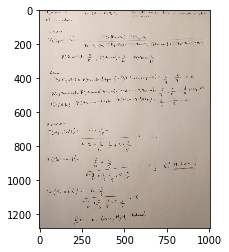

In [31]:
import os
import pandas as pd
from PIL import Image
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Métodos Calibración de Modelos/Clase 02")
os.getcwd()
image = Image.open("Pregunta 3_Tarea 2_Ricardo Zamora Mennigke_Calibracion.jpeg")
plt.imshow(image)

Pregunta 4: [25 puntos] [Filmina 24 de Bayes] Realice la predicciones (a mano) para el registro numero 101.

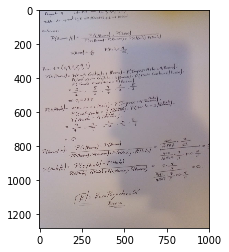

In [32]:
import os
import pandas as pd
from PIL import Image
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Métodos Calibración de Modelos/Clase 02")
os.getcwd()
image = Image.open("Pregunta 4_Tarea 2_Ricardo Zamora Mennigke_Calibracion.jpeg")
plt.imshow(image)